[github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm), mar 2016

<center>
<img width=300 src="./fig/ladisk.png">
<br>
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
<br><br><br>

<font size="10" color="f00e0e" face="garamond"><b>Objektno programiranje, simbolno računanje</b></font>

</center>

In [1]:
import matplotlib.pyplot as plt
import seaborn # ta paket lahko odstranite, namenjen je lepšemu izrisu
%matplotlib inline

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Objektno programiranje

Python omogoča tri tipe programiranja ([docs.python.org](https://docs.python.org/3/howto/functional.html)):

1. proceduralno: seznam instrukcij kaj je treba izvesti (npr.: ``C, Pascal``)
2. funkcijsko: reševanje problema z uporabo funkcij (npr.: ``Mathematica, C++, Php`` )
3. objektno: program bazira na objektih, ki imajo lastnosti, funkcije,... (npr.: ``C++, Java``)


Doslej smo spoznali proceduralno in funkcijsko programiranje. Sledi objektno orientirano programiranje, ki v Pythonu  temelji na **razredih** (*class*), objekti so pa **instance** (*instance*) razreda. Tukaj si bomo pogledali zgolj nekatere osnove objektnega programiranja (da boste lažje razumeli drugo kodo in jo prirejali).

Glejte [docs.python.org](https://docs.python.org/3.4/tutorial/classes.html) za podrobno pomoč.

Poglejmo si preprosti primer:

In [2]:
# proceduralno
a = 5
b = 5 * a

# funkcijsko
def zmnozi(a, b):
    return a*b

# objektno
class Studenti:
    def __init__(self, st_studentov = 1):
        self.st_studentov = st_studentov
        #print('kar nekaj')

In [3]:
razred_NM = Studenti(st_studentov=10)
razred_NM.st_studentov

10

In [4]:
class Pravokotnik:
    """Razred za objekt pravokotnik"""

    def __init__(self, sirina=1, visina=1): # to je konstruktor objekta. Se izvede, če kličemo Pravokotni(sirina=1, visina=4)
        self.sirina = sirina 
        self.visina = visina # visina je atribut objekta
        
    def povrsina(self):
        return self.sirina * self.visina
    
    def set_sirina(self, sirina=1):
        self.sirina = sirina

Bodite pozorni za zamik, ki definira celotni blok, ki pripada razredu. Spremenljivka ``self`` je referenca na instanco razreda (nekateri drugi programski jeziki tukaj uporabijo npr. ``this``).

Ustvarimo sedaj instanco objekta ``Pravokotnik``:

In [5]:
pravokotnik = Pravokotnik(sirina=5)

Vsi atributi so shranjeni v slovarju ``__dict__``:

In [6]:
pravokotnik.__dict__

{'sirina': 5, 'visina': 1}

Do atributov praviloma ne dostopamo preko ``__dict__``, ampak takole:

In [7]:
pravokotnik.sirina

5

Ali objekt ima določeni atribut preverimo z ukazom ``hasattr``:

In [8]:
hasattr(pravokotnik, 'sirina')

True

Pokličimo sedaj še metodo (funkcije v razredih dobijo ime metoda:)) objekta (seveda bi lahko imela tudi parametre):

In [9]:
pravokotnik.povrsina() #poskusite poklicati brez oklepajev ()

5

In [10]:
pravokotnik.set_sirina(sirina=100)

In [11]:
pravokotnik.povrsina()

100

In [12]:
pravokotnik.visina

1

#### Dedovanje

Razredi se lahko dedujejo. Preprosti primer:

In [13]:
class Kvadrat(Pravokotnik):
    "Razred kvadrat"
    
    def __init__(self, sirina=1):
        # kličimo konstruktur razreda Pravokotnik
        super().__init__(sirina=sirina, visina=sirina)
        
    def set_sirina(self, sirina):
        self.sirina = sirina
        self.visina = sirina

In [14]:
kvadrat = Kvadrat(sirina=4)

In [15]:
kvadrat.povrsina()

16

In [16]:
kvadrat.set_sirina(5)

In [17]:
kvadrat.povrsina() # morali bi popraviti tudi to funkcijo

25

Za vajo si sedaj poglejmo kako raširimo en vgrajeni razred (npr. ``list``):

In [18]:
class Seznam(list):
        
    def narisi(self):
        plt.plot(self, 'r.', label='Dolgo besedilo')
        plt.legend()
        plt.ylim(-5, 5)

In [19]:
list()

[]

In [20]:
a = list([1,2,3])
a

[1, 2, 3]

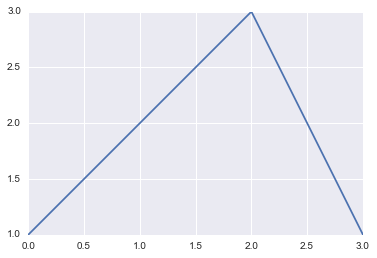

In [21]:
a.append(1)
plt.plot(a);

In [22]:
moj_seznam = Seznam([1, 2, 3])

In [23]:
moj_seznam

[1, 2, 3]

In [24]:
moj_seznam.append(1)

In [25]:
moj_seznam

[1, 2, 3, 1]

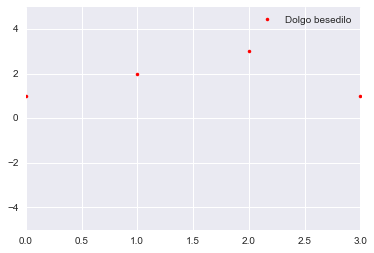

In [26]:
moj_seznam.narisi()

# 2. Simbolno računanje s ``SymPy``

Termin **simbolno računanje** pomeni, da matematične izraze rešujemo v obliki abstraktnih simbolov (in **ne numerično**).

To predavanje temelji na virih:
* J.R. Johansson [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures) in
* [SymPy](http://sympy.org/en/index.html) - uradna dokumentacija modula.

``SymPy`` je eden od sistemov za strojno algebro (CAS - *Computer Algebra Systems*), ki pa ima poleg zmogljivosti tudi to prednost, da je v celoti napisan v Pythonu. Alternativa bi lahko bila npr. [Sage](http://www.sagemath.org/).

Nekatera namenska komercialna orodja:
* [Mathematica](http://www.wolfram.com/mathematica) 
* [Maple](http://www.maplesoft.com/products/maple) 

Najprej uvozimo celotni modul ``SymPy``. Tukaj bomo naredili izjemo in uvozili celotni modul z \* (temu se praviloma izogibamo, saj zavzamemo veliko imenskega prostora).

In [27]:
from sympy import *

Zato, da dobimo lepo oblikovan LaTeX izpis uporabimo:

In [28]:
init_printing()

## Definiranje spremenljivk

Spremenljivke definiramo takole:

In [29]:
x, y, k = symbols('x y k')

In [30]:
x**y

Primer simboličnega izračuna:

In [31]:
sin(1.2*pi + x)**2

In [32]:
sin(pi + x)**2

Če želimo, lahko izraz priredimo spremenljivki:

In [33]:
f = sin(k*x)

Če želimo zapisati enačbo, to naredimo takole:

In [34]:
en = Eq(sin(k*x),0.5)
en

Spremenljivke lahko definiramo tudi tako:

In [35]:
a, b, c = symbols('a b c')# ali tudi: symbols('a', 'b', 'c')

In [36]:
type(a)

sympy.core.symbol.Symbol

Pri definiranju spremenljivk lahko dodajamo predpostavke:

In [37]:
x = Symbol('x', prime=True, positive=True)

In [38]:
x.is_prime

True

In [39]:
x.is_positive

True

In [40]:
x < 0

In [41]:
c = symbols('c', positive=True)

In [42]:
c<0

In [43]:
c.assumptions0

{'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'negative': False,
 'nonnegative': True,
 'nonpositive': False,
 'nonzero': True,
 'positive': True,
 'real': True,
 'zero': False}

## Kompleksna število

Imaginarno število se zapiše z ``I``: 

In [44]:
1+1*I

In [45]:
I**2

In [46]:
(x * I + 1)**2

## Racionalna števila

``SymPy`` pozna tri numerične tipe: ``Real``, ``Rational``, ``Integer``: 

In [47]:
r1 = Rational(4, 5)
r2 = Rational(5, 4)

In [48]:
r1

In [49]:
r1+r2

In [50]:
r1/r2

## Numerični izračun

SymPy uporablja nekatere konstante, npr: ``pi``, ``E`` in ``oo`` za neskončnost.

Če želimo za določeni izraz izračunati numerično vrednost, potem uporabmo funkcijo ``evalf`` ali ``N``, ki imata argument ``n`` (število decimalnih mest).

In [51]:
N(pi,10)

In [52]:
pi.evalf(n=30)

In [53]:
y = symbols('y')

In [54]:
f = (x**y + pi)**2
f

In [55]:
N(f, 5) # enako kot evalf

Za simbole lahko uporabimo tudi numerične vrednosti, to naredimo s funkcijo ``subs``:

In [56]:
f.subs(x, 1.5)

V ``subs`` funkciji lahko uporabimo tudi slovar:

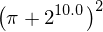

In [57]:
f.subs({x: 2, y: 10.})

In [58]:
N(f.subs({x: 1.5, y: 2}))

ali seznam terk:

In [59]:
f.subs([(x, 1.5), (y, 2)])

Lahko pa `subs` uporabimo tudi kot parameter `evalf`:

In [60]:
f.evalf(subs={x: 1.5, y: 2})

Funkcija ``subs`` je lahko seveda drugi simbol ali izraz:

In [61]:
f.subs(x, y + oo)

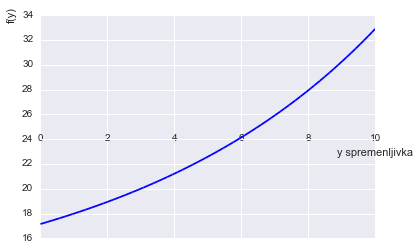

In [62]:
plot(f.subs(x, 1.1), (y, 0, 10), xlabel='y spremenljivka');

### ``SymPy`` in ``NumPy``

In [65]:
import numpy as np

In [66]:
x_vec = np.arange(0, 10, 0.1)

In [67]:
#%%timeit
y_vec = np.array([N(((x + pi)**2).subs(x, _)) for _ in x_vec])

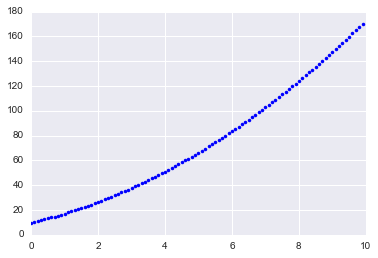

In [68]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec, 'b.');

#### Uporaba ``lambdify`` funkcije

Zgornji način je relativno počasen. Bistveno hitrejši je uporaba pristopa ``lambdify`` kjer se pripravi prevedena funkcija:

In [69]:
f_hitra = lambdify(x, (x + pi)**2, 'numpy')
# več parametrov
#f_hitra = lambdify((x, y), (x + y + pi)**2, 'numpy')

In [70]:
#%%timeit
y_vec = f_hitra(x_vec)
y_vec[:10]

array([  9.8696044 ,  10.50792293,  11.16624146,  11.84455999,
        12.54287852,  13.26119705,  13.99951559,  14.75783412,
        15.53615265,  16.33447118])

## Grafični prikaz

``SymPy`` ima na ``matplotlib`` temelječo prikaz podatkov. Prikaz je sicer glede na ``matplotlib`` bolj omejen in ga uporabljamo za preproste prikaze (sicer pa ``numpy``).

Pomoč je tukaj: http://docs.sympy.org/latest/modules/plotting.html

Primer:

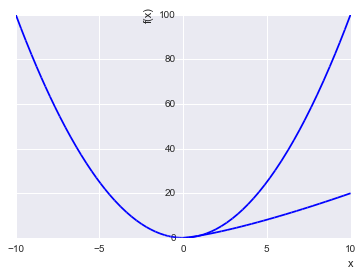

In [71]:
plot(x**2, x**1.3);

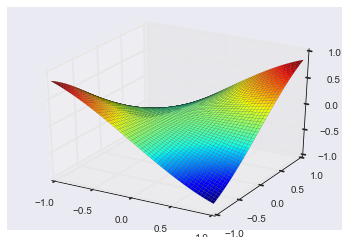

In [72]:
plotting.plot3d(sin(x*y), (x, -1, 1), (y, -1, 1));

## Algebra

V tem poglavju si bomo pogledali nekatere osnove uporabe ``SymPy`` za algebrajske operacije.

### Uporaba ``expand`` in ``factor``

Definirajmo matematični izraz:

In [73]:
f = (x+1)*(x+2)*(x+3)
f

in ga sedaj **razčlenimo** (*expand*):

In [74]:
aa = expand(f)
aa

Če želimo sedaj pogledati konstanto pred ``x``, naredimo to s funkcijo ``coeff``:

In [75]:
aa.coeff(x)

Argumenti funkcije definirajo kakšno razširitev želimo (glejte help!). Če želimo npr. trigonometrično razširitev, potem uporabimo ``trig=True``:

In [76]:
expand(sin(a+b))

In [77]:
expand(sin(a+b), trig=True)

Obratna operacija od razčlenitve je **razcepitev** ali **razstavjanje** ali **faktorizacija**: 

In [78]:
factor(x**3 + 6 * x**2 + 11*x + 6)

Če nas zanimajo posamezni členi, potem to naredimo takole:

In [79]:
factor_list(x**3 + 6 * x**2 + 11*x + 6)

### Poenostavljanje izrazov s ``simplify``

Funkcija ``simplify`` poskuša poenostaviti izraze v bolj preproste (npr. s krajšanjem spremenljivk). Za posebne namene lahko poenostavimo tudi z: ``trigsimp``, ``powsimp``, ``logcombine``, in podobno. 

Več tukaj: http://docs.sympy.org/latest/tutorial/simplification.html

In [80]:
simplify((x+1)*(x+1)*(x+3))

In [81]:
simplify(sin(a)**2 + cos(a)**2)

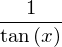

In [82]:
simplify(cos(x)/sin(x))

## Uporaba ``apart`` in ``together``

Funkciji uporabljamo za delo z ulomki:

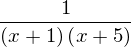

In [83]:
f1 = 1/((1 + x) * (5 + x))
f1

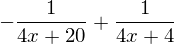

In [84]:
f2 = apart(f1, x)
f2

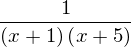

In [85]:
together(f2)

V tem primeru pridemo do podobnega rezultata s ``simplify``:

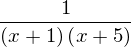

In [86]:
simplify(f2)

## Odvajanje

Odvajanje je načeloma relativno preprosta matematična operacija, ki jo izvedemo s funkcijo ``diff``. Prvi argument je funkcija, ki jo odvajamo po drugem argumentu:

In [87]:
x, y, z = symbols('x y z')
f = sin(x*y) + cos(y*z)
diff(f, x)

Odvodi višjega reda:

In [88]:
diff(f, x, x, x)

Drugačna oblika zgornjega odvoda:

In [89]:
diff(f, x, 3)

Odvod po več spremenljivkah $\frac{d^3f}{dx\,dy^2}$ izvedemo takole:

In [90]:
diff(f, x, 1, y, 2)

## Integriranje

Integriranje izvajamo s funkcijo ``integrate``, ki v primeru nedoločenega integriranja sprejme dva argumenta: funkcijo in spremenljivke po kateri integriramo:

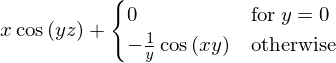

In [91]:
integrate(f, x)

Določeno integriranje izvedemo z definiranjem integracijskih mej:

In [92]:
integrate(f, (x, -1, 1))

V kolikor so meje v neskončnosti, integriramo z vgrajeno konstanto za neskončnost ``oo``:

In [93]:
integrate(exp(-x**2), (x, -oo, oo))

## Vsota in produkt vrste

Vsoto vrste definiramo s pomočju funkcije ``Sum`` (velika črka, ker je ``sum`` že rezervirana v Pythonu):

In [94]:
n = Symbol("n")

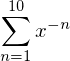

In [95]:
#f = Sum(1/x**n, (n, 1, oo))
f = Sum(1/x**n, (n, 1, 10))
f

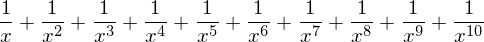

In [96]:
f.doit()

In [97]:
f.subs({x: 3}).evalf()

Produkt vrste definiramo podobno s funkcijo ``Product``:

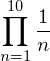

In [98]:
f = Product(1/n, (n, 1, 10))
f

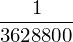

In [99]:
f.doit()

## Limitni račun

Limite računamo s pomočjo funkcije ``limit``: 

In [100]:
limit(sin(x)/x, x, 0)

Poglejmo kako lahko s funkcijo ``limit`` preverimo rezultat odvajanja s funkcijo ``diff``.

Za funkcijo:

In [101]:
f = sin(x*y) + cos(y*z)
diff(f, x)

mora veljati $\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$. Preverimo, če res:

In [102]:
h = Symbol('h')

In [103]:
limit((f.subs(x, x+h) - f)/h, h, 0)

## Taylorjeve vrste

Taylorjeve vrste se izračunjo s pomočjo funkcijo ``series``:

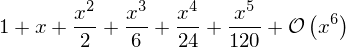

In [104]:
series(exp(x), x) # privzete vrednosti x0=0, in n=6

Če želimo definirati drugo izhodišče ($x0=2$) in z več členi ($n=8$), to izvedemo takole:

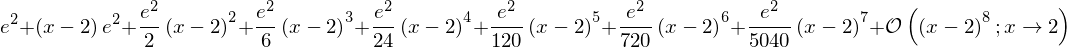

In [105]:
series(exp(x), x, x0=2, n=8)

Rezultat vključuje tudi red veljavnosti; na tak način lahko kontroliramo veljavnosti izvajanja. Primer:

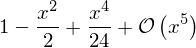

In [106]:
s1 = cos(x).series(x, 0, 5)
s1

In [107]:
s2 = sin(x).series(x, 0, 2)
s2

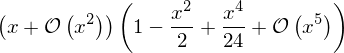

In [108]:
s1 * s2

Ugotovimo, da členi stopnje 2 in več niso smiselni:

In [109]:
s3 = simplify(s1 * s2)
s3

Podatek o stopnji veljavnosti lahko odstranimo:

In [110]:
s3.removeO()

## Linearna algebra

#### Matrike in vektorji

Matrike in vektorje definiramo s funkcjo ``Matrix``:

In [111]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

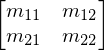

In [112]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [113]:
b = Matrix([[b1], [b2]])
b

Tipične operacije:

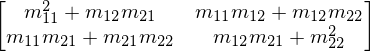

In [114]:
A**2

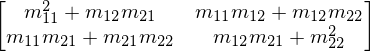

In [115]:
A*A

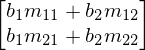

In [116]:
A * b

Ker uporabljamo *matrični* zapis, moramo paziti na stolpične in vrstične vektorje (spomnimo se: pri ``numpy`` uporabljamo sezname in nam na to ni potrebno paziti)

In [117]:
b.T*b

Determinanta, inverz:

In [118]:
A.det()

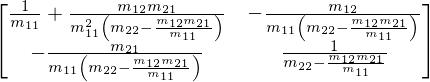

In [119]:
A.inv()

## Reševanje enačb

Enačbe in sistem enačb rešujemo s funkcijo ``solve``:

In [120]:
en = Eq(sin(x**2), 1/2)
en

In [121]:
solve(en, x)

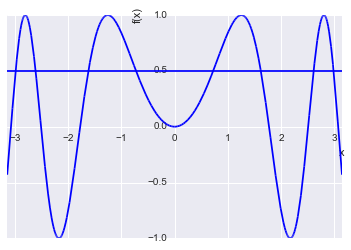

In [122]:
plot(sin(x**2), 0.5, (x, -pi, pi));

Gre za nelinearno enačbo z več rešitvami. Rešitev lahko iščemo tudi numerično v izbrani okolici:

In [123]:
sol = nsolve(en, x, 3)
#N(sol,10)
N(sol)

Kvadratna enačba

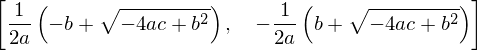

In [124]:
a, b, c = symbols(('a', 'b', 'c'))
solve(a*x**2 + b*x + c, x)

Sistem enačb

In [125]:
x, y = symbols('x y')
solve([x + y - 1, x - y - 1], [x, y])

## Reševanje diferencialnih enačb

Preprost primer na površini s koeficientom trenja $\mu$ drseče mase $m$. Začetna hitrost je $v_0$.

Definirajmo simbole:

In [126]:
x = symbols('x') # ali lahko tudi x = Function('x')
t, m, mu, g, v0 = symbols('t m mu g v0', real=True, positive=True)

Definirajmo diferencialno enačbo:

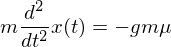

In [127]:
eq = Eq(m*x(t).diff(t,2), -mu*g*m)
eq

Nekaj lastnosti:

In [128]:
ode_order(eq, x(t))

In [129]:
classify_ode(eq)

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

Rešitev:

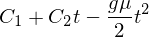

In [130]:
x_r=dsolve(eq, x(t)).args[1]
x_r

Začetni pogoji:

In [131]:
C1 = solve(Eq(x_r.subs(t,0),0), 'C1')[0]

In [132]:
C2 = solve(Eq(x_r.diff(t).subs(t,0),v0), 'C2')[0]

In [133]:
C1, C2

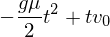

In [134]:
x_r = x_r.subs('C1', C1).subs('C2', C2)
x_r

Vstavimo podatke:

In [135]:
podatki = {g: 9.81, mu: 0.1, v0: 1}
x_p = x_r.subs(podatki)
x_p

In prikažemo:

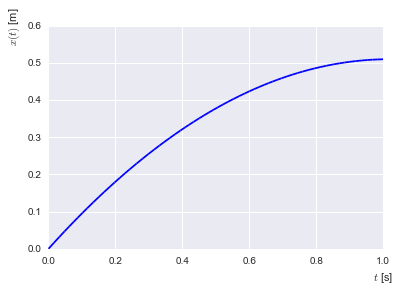

In [136]:
plot(x_p, (t, 0, 1), xlabel='$t$ [s]', ylabel='$x(t)$ [m]');

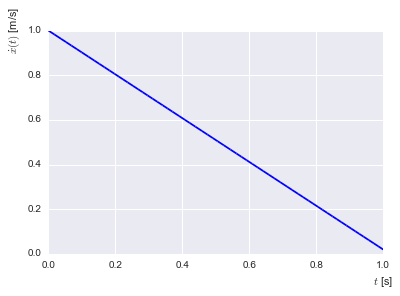

In [137]:
plot(x_p.diff(t), (t, 0, 1), xlabel='$t$ [s]', ylabel='$\dot{x}(t)$ [m/s]');

# Do naslednjih vaj preštudirajte sledeče:

1. Pojasnite na primeru *proceduralno* in *funkcijsko* programiranje.
* Definirajte preprosti objekt, naredite nekaj funkcij temu objektu.
* Definirajte objekt, ki pri kreiranju instance zahteva zgolj celoštevilsko vrednost, t.j.: dolžino seznama (uporabili bomo pri naslednji točki).
* Objektu iz prejšnje točke naj pri inicializacii argumentu ``data`` priredi naključni seznam ustrezne dolžine (glejte funkcijo ``np.random.rand``).
* Objektu iz prejšnje točke dodajte metodo za zapis vrednosti v datoteko s pomočjo funkcije ``np.savetxt``.
* Enako kakor prejšnja točka, vendar naj se podatki shranijo v binarni obliki s pomočjo modula ``pickle``
* Dodajte metodo za branje iz datoteke (s pomočjo ``np.genfromtxt``).
* Uvozite ves naslovni prostor iz ``SymPy``. Nastavite lep izpis rezultatov.
* Za trikotnik na sliki definirajte funkcijo za izračun površine in volumna.

<img src="./fig/trikotnik.png" width=300>

* Izračunajte številčne vrednosti (podatki naj bodo definirani v slovarju in si jih izmislite).
* Izračunajte statični moment ploskve $S_{xx}=\int_A y\,dA=\int_{0}^{b} y\,x(y)\,dy$, kjer je $x(y)=a-a\,y/b$.
* Izračunajte vztrajnostni moment ploskve $I_{xx}=\int_A y^2\,dA$, $dA = x(y) \cdot dy$.
* Prikažite $I_{xx}$ v odvisnosti od parametra $b$ ($a$ definirate poljubno)
* Nedoločeno in določeno (v mejah od 0 do $\tau$) integrirajte izraz: $\sin(5+t)+e^t$.
* Z odvajanjem pokažite pravilnost nedoločenega integrala iz predhodnega koraka.
* Za kotaleči valj (polmer $r$, masa $m$) povežite translatorno $x$ prostost z rotacijsko $\varphi$. Pozneje boste vse izrazili s slednjo. Namig: Dolžina loka kroga ustreza zmnožku polmera $r$ in kota $\varphi$ [rad].
* Določite translatorno kinetično energijo težišča (definirajte s hitrostjo $\dot x$, zaradi predhodne povezave, pa bi naj bil rezultat s $\dot{\varphi}$). $E_k = \frac{1}{2} \, m \, v^2$
* Določite še masni vztrajnostni moment valja in rotacijsko kinetično energijo. Obe kinetični energiji seštejte in izraz poenostavite (če je potrebno). $J_v = \frac{1}{2} \, m \, r^2$ $E_{k, r} = \frac{1}{2} \, J_v \, \left[\frac{d}{dt} \varphi(t)\right]^2$
* Če na valj deluje moment $-M$, definirajte mehansko energijo: $E_m=-M\,\varphi$ in določite gibalno enačbo iz spremembe mehanske energije: $\frac{d E_m}{d t}=\frac{d E_k}{d t}$
* Nadaljujete na predhodni enačbi: poiščete ``sympy`` funkcijo ``replace`` in ugotovite razliko z ``subs``. Poskusite s pomočjo ``replace`` $\dot{\varphi}$ na obeh straneh enačbe spremeniti v 1.
* Najdite rešitev za predhodno pridobljeno diferencialno enačbo.
* Izmislite se začetne pogoje in jih uporabite na predhodno rešeni diferencialni enačbi. Izmislite si še preostale podatke ter prikažite rezultat.
* Določite čas, ko je zasuk $\varphi$ spet enak začetnemu (če ste predpostavili začetni zasuk nič, potem torej iščete $\varphi=0$. Določite tudi čas, ko je kotna hitrost $\dot{\varphi}$ enaka nič.

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 4 - polovica.ipynb).

# Ekstra

##  sympy.mechanics
``sympy`` ima vgrajeno podporo za simuliranje sistema teles. Glejte tole predstavitev: http://pyvideo.org/video/2006/dynamics-with-sympy-mechanics-scipy-2013-present (tukaj je v predstavitvi prikazan primer: http://www.moorepants.info/blog/npendulum.html) 


## ipywidgets

Najprej si bomo pogledali preprosto in tudi pogosto uporabo ``ipywidgets``.

In [138]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
t = np.linspace(0, 1, 400)
def narisi(frekvenca=1., razmernik_dusenja=0.):
    ω0 = 2*np.pi*frekvenca
    ωd = ω0 * np.sqrt(1 - razmernik_dusenja**2)
    x = np.sin(ωd*t) * np.exp(-ω0*razmernik_dusenja*t)
    plt.plot(t, x)
    plt.show()

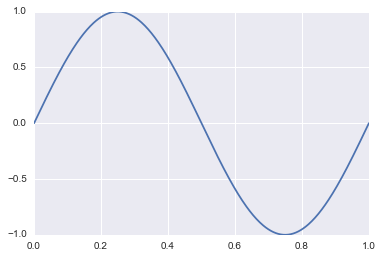

<function __main__.narisi>

In [140]:
interact(narisi, frekvenca=(1, 10, 0.5), razmernik_dusenja=(0., 1., 0.1))

## Napredna uporaba
Poglejte napredno uporabo IPython/Jupiter notebooka: [github.com/ipython/ipywidgets/](https://github.com/ipython/ipywidgets/tree/master/examples). Primer spodaj.

In [141]:
import networkx as nx

In [142]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

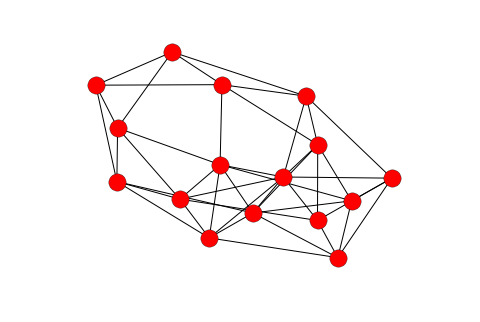

In [143]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });